#  Bagging and Boosting

In the previous notebook, we saw another supervised machine learning technique called Decision Trees. As we saw, Decision Trees have several advantages: they are easy to understand and interpret, they don't require much data preparation, and they can handle both numerical and categorical data. Also, as opposed to `LogisticRegression` they can handle non-linear problems. However, Decision Trees also have some limitations. In particular, Decision Trees are very sensitive to small variations in the training data, and they tend to overfit. As was the case with the linear models, one way to address these limitations is to use more complex models. Instead of going deeper, however, in the case of Decision Trees, we can use multiple models: we go wider. This is the idea behind ensemble learning.

In this notebook, we will see two ensemble learning techniques: Bagging and Boosting. We will see how they can be used to improve the performance of Decision Trees. For each technique, we will specific and powerful algorithms: 

- for bagging, we will look at the Random Forest model, 
- for boosting, we will look at eXtreme Gradient Boosting (XGBoost).

Both types of techniques can be used for classification and regression problems. In this notebook, we will focus on classification problems.

## Bagging: the Random Forest Model

Bagging stands for Bootstrap Aggregating. The idea is to train multiple models on different subsets of the training data and then aggregate their predictions. The subsets are created by sampling with replacement from the training data. This means that some samples will be repeated in the subsets, while others will be left out. The idea is to create diversity among the models.
One of the most popular bagging algorithms is the [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). A Random Forest is a collection of Decision Trees, where each tree is trained on a different subset of the training data. The predictions of the trees are then aggregated to make the final prediction. Next to sampling the training data, Random Forests also sample the features. This means that each tree is trained on a different subset of the features. This further increases the diversity among the trees. To make a prediction, the Random Forest averages the predictions of the individual trees (for regression problems) or takes a majority vote (for classification problems).

### Advantages
------------------------------------------------------------
- Less prone to overfitting the data (better predictive ability)
- Can deal with both numerical and categorical data

### Disadvantages
------------------------------------------------------------
- More difficult to understand / interpret the models, because there are many decision trees

### The parameters include
------------------------------------------------------------

- The number of estimators (trees)
- Max depth of a tree (low values may overfit data, high values may underfit data)
- Minimum samples in a leaf node of a tree ( low values may overfit data, high values may underfit data)
- For more information, see the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

## Training a Random Forest model

We will start again by loading and preparing the data, this exercise should be familiar by now.

In [ ]:
import os

try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

if IN_COLAB:
    os.environ['DATA_DIRECTORY'] = '/content'
else:
    os.environ['DATA_DIRECTORY'] = '../../data'

data_directory = os.getenv('DATA_DIRECTORY')

In [ ]:
%%bash
if [ ! -f "$DATA_DIRECTORY/course-data.zip" ]; then
    wget "https://gitlab.com/api/v4/projects/52375047/jobs/artifacts/master/raw/data/course-data.zip?job=build_data_zip" -O "$DATA_DIRECTORY/course-data.zip"
    unzip "$DATA_DIRECTORY/course-data.zip" -d "$DATA_DIRECTORY"
fi

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd


# Load the Titanic dataset
titanic_df = pd.read_csv(os.path.join(data_directory, 'titanic/train_preprocessed.csv'))
titanic_df.head()

# Getting the target variable
y_true = titanic_df['Survived']

# Dropping the target variable from the dataset
titanic_df = titanic_df.drop('Survived', axis=1)

train_df, test_df, y_train, y_test = train_test_split(titanic_df, y_true, test_size=0.2, random_state=42)
train_df.shape, y_train.shape, test_df.shape, y_test.shape

((712, 26), (712,), (179, 26), (179,))

In [3]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(n_estimators=300, random_state=42)
random_forest_model.fit(train_df, y_train)

RandomForestClassifier(n_estimators=300, random_state=42)

### Evaluating the Model

After training, we will evaluate the model using the `classification_report`, just like we did in the previous notebooks.

In [4]:
from sklearn.metrics import classification_report

y_pred = random_forest_model.predict(test_df)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       105
           1       0.76      0.74      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



## Boosting: eXtreme Gradient Boosting (XGBoost)

Boosting is another ensemble learning technique. The idea is to train multiple models sequentially, where each model tries to correct the errors of the previous model. This is done by assigning higher weights to the observations that were misclassified by the previous model. One of the most popular boosting algorithms is [XGBoost](https://xgboost.readthedocs.io/en/latest/). 

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It is based on the Gradient Boosting framework, but it has some additional features that make it more powerful and efficient. For example, XGBoost uses a more regularized model formalization to control overfitting, which gives it better performance. XGBoost also has a more efficient algorithm for splitting nodes in the trees, which makes it faster. Finally, XGBoost can handle missing values, which is a common problem in real-world data.

In [5]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=300, random_state=42)
xgb_model.fit(train_df, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

### Evaluating the Model

After training, we will evaluate the XGBoost model using the `classification_report`, just like we did above.

In [6]:
y_pred = xgb_model.predict(test_df)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       105
           1       0.76      0.77      0.77        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



## Comparison of the decision surfaces of ensembles of trees 

To give a visual impression of the difference between Decision Trees and Random Forests, we will plot the decision surfaces of both models. This will give us an idea of how the models make predictions. For the numerical columns, we plot the value of one column on the y-axis, and the value of the other column on the x-axis. The color of the points represents the class. The decision surface is the boundary where the model changes its prediction. For Decision Trees, the decision surface is a series of straight lines, while for Random Forests, the decision surface is more complex as can be seen in the plot below. For Random Forests, the decision surface is the average of the decision surfaces of the individual trees, this causes the decision boundaries to be more complex and less sharp.

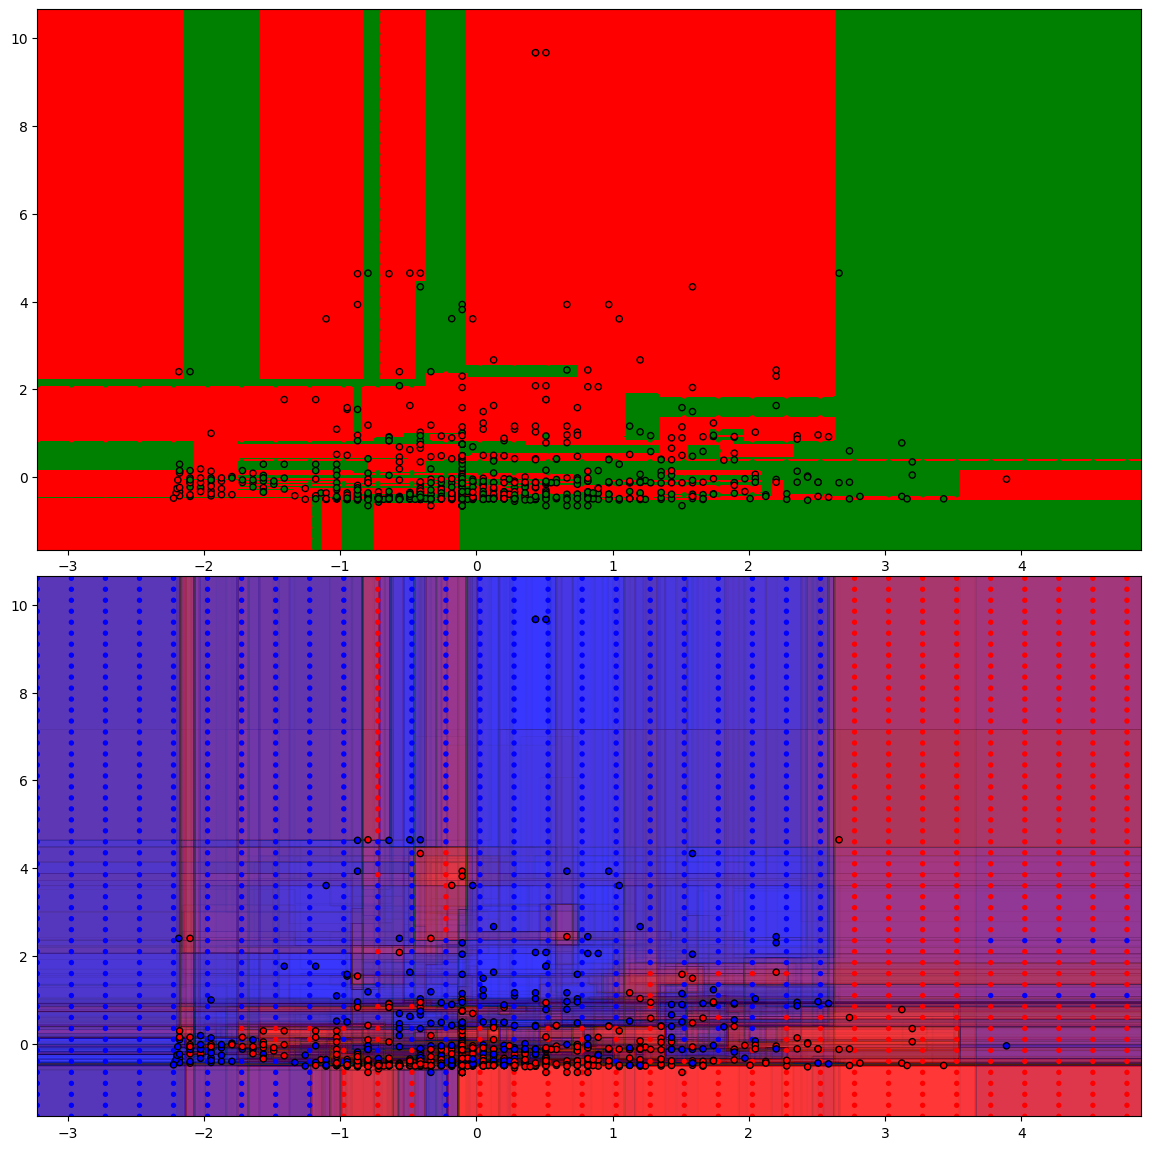

In [27]:
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import itertools

# Parameters
n_classes = 3
n_estimators = 100
grb = matplotlib.colors.ListedColormap(['green', 'red'])
rgb = matplotlib.colors.ListedColormap(['red', 'green', 'blue'])
brg = matplotlib.colors.ListedColormap(['blue', 'red', 'green'])
cmap = [grb, rgb, rgb]

plot_step = 0.02  # fine step width for decision surface contours
plot_step_coarser = 0.25  # step widths for coarse classifier guesses
RANDOM_SEED = 13  # fix the seed on each iteration

# Load data
iris = load_iris()

plot_idx = 1

models = [DecisionTreeClassifier(max_depth=None),
          RandomForestClassifier(n_estimators=n_estimators)]
          #XGBClassifier(n_estimators=n_estimators)]


numerical_columns = ['Age', 'Fare']
column_pairs = [['Age', 'Fare']] #list(itertools.combinations(titanic_df.columns, 2))
num_plots = len(models) * len(column_pairs)

plt.figure(figsize=(12, 12))

for model in models:
    for selected_columns in column_pairs:
        color_idx =(plot_idx - 1) % 3
        current_color_map = cmap[color_idx]

        # We only take the two corresponding features
        X = titanic_df[list(selected_columns)].to_numpy()
       
        # Shuffle
        idx = np.arange(X.shape[0])
        np.random.seed(RANDOM_SEED)
        np.random.shuffle(idx)
        X = X[idx]
        y = y_true[idx]

        # Train
        model.fit(X, y)

        plt.subplot(len(models), len(column_pairs), plot_idx)

        # Now plot the decision boundary using a fine mesh as input to a
        # filled contour plot
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))

        # Plot either a single DecisionTreeClassifier or alpha blend the
        # decision surfaces of the ensemble of classifiers
        if isinstance(model, DecisionTreeClassifier):
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            cs = plt.contourf(xx, yy, Z, cmap=current_color_map)
        else:
            # Choose alpha blend level with respect to the number
            # of estimators
            # that are in use (noting that AdaBoost can use fewer estimators
            # than its maximum if it achieves a good enough fit early on)
         
            estimators = model.estimators_
            estimator_alpha = 1.0 / len(estimators)

            for tree in estimators:
                Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
                Z = Z.reshape(xx.shape)
                cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=current_color_map)

        # Build a coarser grid to plot a set of ensemble classifications
        # to show how these are different to what we see in the decision
        # surfaces. These points are regularly space and do not have a
        # black outline
        xx_coarser, yy_coarser = np.meshgrid(
            np.arange(x_min, x_max, plot_step_coarser),
            np.arange(y_min, y_max, plot_step_coarser))
        Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(),
                                         yy_coarser.ravel()]
                                         ).reshape(xx_coarser.shape)
        cs_points = plt.scatter(xx_coarser, yy_coarser, s=15,
                                c=Z_points_coarser, cmap=current_color_map,
                                edgecolors="none")

        # Plot the training points, these are clustered together and have a black outline
        plt.scatter(X[:, 0], X[:, 1], c=y,
                    cmap=current_color_map,
                    edgecolor='k', s=20)
        plot_idx += 1  # move on to the next plot in sequence

plt.axis("tight")
plt.tight_layout(h_pad=0.2, w_pad=0.2, pad=2.5)
plt.show()

In the plot above, we show the decision surfaces of a Decision Tree and a Random Forest. The decision surface is comprised of a fine grid of points, where the color represents the class. We also plot a more coarse grid of points, to plot a set of ensemble classifications. Last, we plot the training data, the points with the black border. 

# Conclusion


Random Forest and eXtreme Gradient Boosting are two popular examples of bagging and boosting, respectively. However, there are many more ensemble techniques. Some of them can be found in the sklearn package. For the sklearn documentation on ensembles look [here](https://scikit-learn.org/stable/modules/ensemble.html).